<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [505]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
pd.set_option("display.precision", 2)
seaborn.set_context('talk')

In [506]:
%matplotlib inline

In [507]:
#import re

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [571]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [572]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [579]:
df.work_contract_type.value_counts()

Full-Time                                                 5166
Part-Time                                                  310
Remoto (empresa de otro país)                              231
Tercerizado (trabajo a través de consultora o agencia)     219
Freelance                                                  169
Name: work_contract_type, dtype: int64

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [510]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [511]:
df.tools_programming_languages[:4]

0                                              Ninguno
1                             HTML, Javascript, Python
2                                              Ninguno
3    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [512]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
    if not isinstance(languages_str, str):
        return []
    # Remove 'other' option
    languages_str = languages_str.lower()\
        .replace('ninguno de los anteriores', '')
    # Split string into list of items
    # Remove spaces and commas for each item
    return [lang.strip().replace(',', '')
            for lang in languages_str.split()]


# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'}).copy()
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [513]:
#Drop NA
df_lang.dropna(subset=['salary_monthly_NETO'], inplace=True)

**me concentro en lenguajes para desarrollo web**

In [514]:
#scala?
#.net? 
#Python? es de uso general, no solo web pero se usa mucho en back hoy en día, puede sesgar la muestra
web_lang_str = 'react|elm|dart|ruby|kotlin|typescript|php|html|css|javascript'

In [515]:
df_lang = df_lang[df_lang.programming_language.str.contains(web_lang_str)]

In [516]:
language_count = (df_lang.programming_language.value_counts()
                  .reset_index()
                  .rename(columns={'index': 'language', 'programming_language': 'frequency'}))

In [517]:
language_count

,language,frequency
0,javascript,2409
1,html,1793
2,css,1199
3,php,853
4,typescript,743
5,kotlin,180
6,ruby,144
7,dart,38
8,scss,2
9,elm,1


In [518]:
#Nos quedamos solo con freq>100
min_freq = 100

In [521]:
web_lang_list = language_count[language_count.frequency > min_freq].language.tolist()

In [523]:
df_lang = df_lang[df_lang.programming_language.isin(web_lang_list)]

<AxesSubplot:>

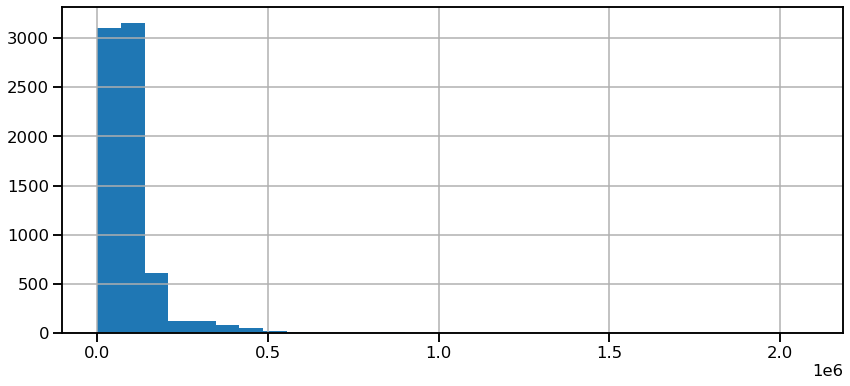

In [524]:
plt.subplots(figsize=(14,6))
df_lang.salary_monthly_NETO.hist(bins=30)

<AxesSubplot:xlabel='salary_monthly_NETO'>

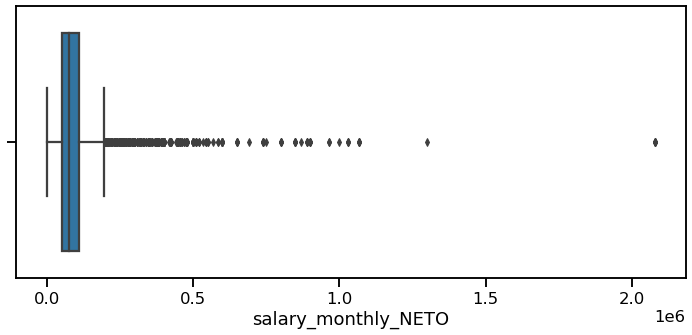

In [525]:
plt.subplots(figsize=(12,5))
sns.boxplot(x=df_lang.salary_monthly_NETO)

In [526]:
max_box_salary = 1.5*(df_lang.salary_monthly_NETO.quantile(0.75)-df_lang.salary_monthly_NETO.quantile(0.25))
max_box_salary

88500.0

In [527]:
#Definimos cotas salariales
min_sal = 30e3
max_sal = 300e3

In [528]:
df_lang = df_lang[(df_lang.salary_monthly_NETO >= min_sal) & (df_lang.salary_monthly_NETO <= max_sal)]

<AxesSubplot:xlabel='salary_monthly_NETO'>

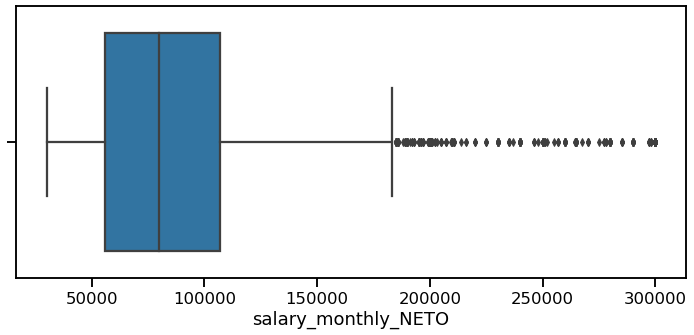

In [529]:
plt.subplots(figsize=(12,5))
sns.boxplot(x=df_lang.salary_monthly_NETO)

In [530]:
df_lang['count_lang'] = df_lang.cured_programming_languages.apply(len)

In [531]:
df_lang.sample(10)

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages,count_lang
5761,javascript,"Bash/Shell, CSS, HTML, Java, Javascript, SQL, ...",99000.0,"[bash/shell, css, html, java, javascript, sql,...",7
6067,html,"CSS, HTML, Java, Javascript, SQL",42000.0,"[css, html, java, javascript, sql]",5
1277,javascript,".NET, HTML, Java, Javascript, SQL",66000.0,"[.net, html, java, javascript, sql]",5
3967,typescript,"CSS, HTML, Javascript, TypeScript",41000.0,"[css, html, javascript, typescript]",4
2297,javascript,"CSS, HTML, Java, Javascript, PHP",60000.0,"[css, html, java, javascript, php]",5
1044,html,"CSS, HTML, Java, SQL",37000.0,"[css, html, java, sql]",4
3223,javascript,"CSS, HTML, Javascript",31000.0,"[css, html, javascript]",3
1505,css,"CSS, HTML, Java, Javascript",50000.0,"[css, html, java, javascript]",4
483,javascript,"CSS, HTML, Javascript, Python",67000.0,"[css, html, javascript, python]",4
1239,html,"C, C++, COBOL, HTML, Java, Javascript, Python,...",87279.0,"[c, c++, cobol, html, java, javascript, python...",8


In [532]:
df_lang.salary_monthly_NETO.describe()

count      6542.00
mean      89537.95
std       48644.63
min       30000.00
25%       55800.00
50%       80000.00
75%      107000.00
max      300000.00
Name: salary_monthly_NETO, dtype: float64

In [533]:
(df_lang
 .groupby('programming_language')
 .agg(count_=('salary_monthly_NETO','count'), 
      salary_neto_mean=('salary_monthly_NETO', 'mean'),
      salary_neto_median=('salary_monthly_NETO', 'median'))
 .sort_values('salary_neto_mean', ascending=False))

,count_,salary_neto_mean,salary_neto_median
programming_language,,,
kotlin,166,114149.16,108954.0
ruby,120,113404.79,96500.0
typescript,663,95791.09,85208.0
javascript,2168,90457.76,80000.0
php,760,88423.92,78000.0
html,1600,85429.32,75000.0
css,1065,84214.96,75000.0


<AxesSubplot:xlabel='programming_language', ylabel='salary_monthly_NETO'>

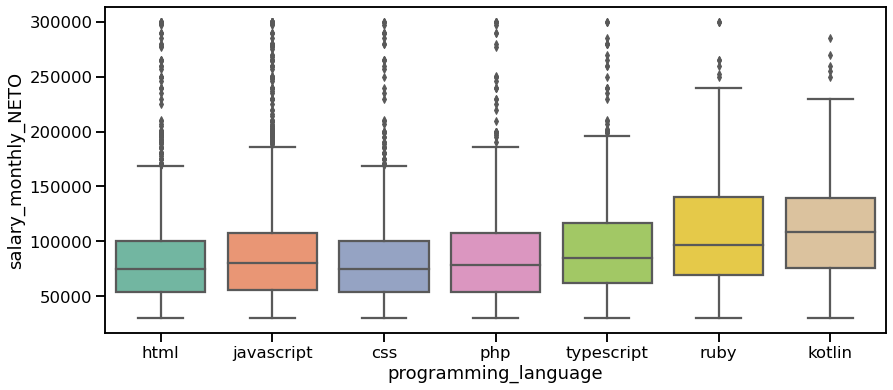

In [534]:
plt.subplots(figsize=(14,6))
sns.boxplot(data=df_lang, x='programming_language', y='salary_monthly_NETO', palette='Set2')

In [535]:
df_lang.count_lang.value_counts().sort_index()

1      188
2      483
3      883
4     1221
5     1228
6     1030
7      704
8      354
9      195
10      83
11      70
12      39
13      21
14      22
15       4
16       9
17       8
Name: count_lang, dtype: int64

<AxesSubplot:>

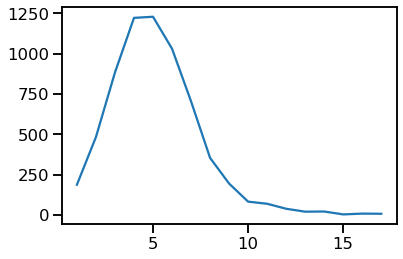

In [536]:
df_lang.count_lang.value_counts().sort_index().plot()

In [548]:
sample_n_cunt_lang = df_lang.count_lang.value_counts().sort_index().values

<AxesSubplot:label='c6a0501c-4805-4149-8028-91e17f1665cd'>

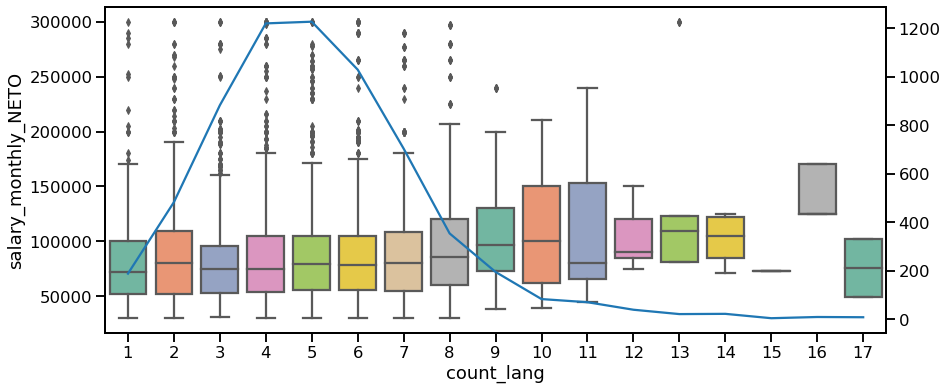

In [570]:
plt.subplots(figsize=(14, 6))
ax1 = sns.boxplot(data=df_lang, y='salary_monthly_NETO',
                  x='count_lang', palette='Set2')

ax2 = ax1.twinx()
sns.lineplot(data=df_lang.count_lang.value_counts().sort_index().values, )

<AxesSubplot:xlabel='count_lang', ylabel='salary_monthly_NETO'>

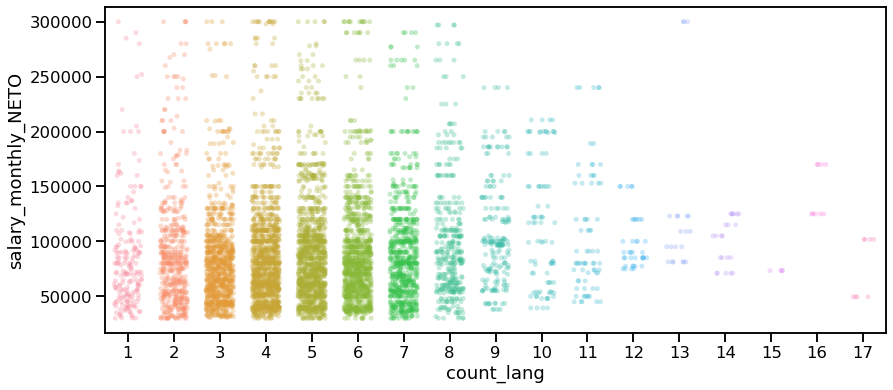

In [540]:
plt.subplots(figsize=(14,6))
sns.stripplot(data=df_lang, y='salary_monthly_NETO', x='count_lang', jitter=0.3, alpha=.3)

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
